In [2]:
import numpy as np
# import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [3]:
data = pd.read_csv('data.csv', sep = '\t', delimiter = None)

In [4]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [5]:
# duplicate data
data_1 = data.copy()
# Remove major
data_1 = data_1.drop(['major', 'country', 'uniquenetworklocation', 'source'],axis=1)
# Remove time and position
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1 = data_1.drop(position,axis=1)
data_1 = data_1.drop(time,axis=1)
# remove introelapse, testelapse, surveyelapse
data_1 = data_1.drop(data_1.iloc[:,42:45],axis=1)
data_2 = data_1.copy()
# Remove VCL
data_2 = data_2.drop(data_2.iloc[:,52:68],axis=1)
data_2 = data_2.replace(to_replace=0,value=3)
# Rename Ten Item Personlaity code
data_2 = data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_1.shape)
print('Attributes',data_1.columns)
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 81)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize'],
      dtype='object')
Shape (39775, 65)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',

In [6]:
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,2,16,1,1,12,1,10,2,1,2
1,4,1,2,3,4,4,3,4,3,2,...,1,16,2,2,7,3,70,2,1,4
2,3,1,4,1,4,3,1,3,2,4,...,2,17,2,1,4,3,60,1,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,13,2,2,4,5,70,2,1,5
4,2,2,3,4,4,2,4,4,4,3,...,2,19,2,3,10,1,10,2,1,4


In [7]:
# Grouping age
def condition(x):
    if x <= 10:
        return 'Under Age'
    if  10 <= x <= 16:
        return 'Children'
    if 17 <= x <= 21:
        return 'Teen'
    if 21 <= x <= 35:
        return 'Adults'
    if 36 <= x <= 48:
        return 'Elder Adults'
    if x >= 49:
        return 'Older People'

data_2['AgeGroups'] = data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,4,4,2,4,4,4,4,4,2,1,...,16,1,1,12,1,10,2,1,2,Children
1,4,1,2,3,4,4,3,4,3,2,...,16,2,2,7,3,70,2,1,4,Children
2,3,1,4,1,4,3,1,3,2,4,...,17,2,1,4,3,60,1,1,3,Teen
3,2,3,2,1,3,3,4,2,3,3,...,13,2,2,4,5,70,2,1,5,Children
4,2,2,3,4,4,2,4,4,4,3,...,19,2,3,10,1,10,2,1,4,Teen


In [8]:
# Filter DAS
data_das = data_2.iloc[:,42:]
print('Attributes',data_das.columns)
data_3=data_2.filter(regex='Q\d{1,2}A')
print('Attributes',data_3.columns)
# data_3.head()


Attributes Index(['Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A'],
      dtype='object')


In [9]:
# Categorized DAS
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3 = sub(data_3)
das_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
d = []
for i in das_keys["Depression"]:
    d.append('Q'+str(i)+'A')
s = []
for i in das_keys["Stress"]:
    s.append('Q'+str(i)+'A')
a = []
for i in das_keys["Anxiety"]:
    a.append('Q'+str(i)+'A')
depression = data_3.filter(d)
stress = data_3.filter(s)
anxiety = data_3.filter(a)

In [10]:
# scoring system
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [11]:
# DAS set
display(depression.head(), stress.head(), anxiety.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [12]:
DEPRESSION = pd.merge(depression, data_das, how='inner', left_index=True, right_index=True)
ANXIETY = pd.merge(anxiety, data_das, how='inner', left_index=True, right_index=True)
STRESS = pd.merge(stress, data_das, how='inner', left_index=True, right_index=True)

print('Attributes',DEPRESSION.columns)
display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

Attributes Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Total_Count',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,1,3,0,3,3,2,0,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,1,3,1,3,2,3,1,1,2,1,...,16,2,2,7,3,70,2,1,4,Children
2,3,3,3,3,3,3,3,3,0,3,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,2,0,1,2,0,0,1,2,...,13,2,2,4,5,70,2,1,5,Children
4,2,3,2,3,2,3,2,1,3,2,...,19,2,3,10,1,10,2,1,4,Teen


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,3,3,3,3,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,3,3,3,1,1,3,1,2,2,2,...,16,2,2,7,3,70,2,1,4,Children
2,2,2,2,1,0,0,1,2,1,1,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,1,1,0,3,0,0,3,2,...,13,2,2,4,5,70,2,1,5,Children
4,1,1,3,1,3,3,3,2,1,1,...,19,2,3,10,1,10,2,1,4,Teen


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,1,3,2,2,3,3,2,...,16,1,1,12,1,10,2,1,2,Children
1,0,2,2,2,2,0,0,0,1,3,...,16,2,2,7,3,70,2,1,4,Children
2,0,0,0,1,3,1,0,1,1,0,...,17,2,1,4,3,60,1,1,3,Teen
3,2,0,3,2,1,0,1,0,0,0,...,13,2,2,4,5,70,2,1,5,Children
4,1,3,3,3,3,3,3,3,3,3,...,19,2,3,10,1,10,2,1,4,Teen


In [13]:
def depression_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

def anxiety_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

def stress_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

DEPRESSION['Condition'] = DEPRESSION['Total_Count'].apply(depression_condition)
ANXIETY['Condition'] = ANXIETY['Total_Count'].apply(anxiety_condition)
STRESS['Condition'] = STRESS['Total_Count'].apply(stress_condition)

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Mild
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


In [14]:
# Simplified variable
data_depression=DEPRESSION.copy()
data_anxiety=DEPRESSION.copy()
data_stress=DEPRESSION.copy()

def depression_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def anxiety_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def stress_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def age_value(x):
    if x <= 10:
        return 0
    if  10 <= x <= 16:
        return 1
    if 17 <= x <= 21:
        return 2
    if 21 <= x <= 35:
        return 3
    if 36 <= x <= 48:
        return 4
    if x >= 49:
        return 5

data_depression['Condition'] = data_depression['Total_Count'].apply(depression_value)
data_depression['AgeGroups'] = data_depression['age'].apply(age_value)
data_depression = data_depression.drop(columns=['age','Total_Count'])

data_anxiety['Condition'] = data_anxiety['Total_Count'].apply(anxiety_value)
data_anxiety['AgeGroups'] = data_anxiety['age'].apply(age_value)
data_anxiety = data_anxiety.drop(columns=['age','Total_Count'])

data_stress['Condition'] = data_stress['Total_Count'].apply(stress_value)
data_stress['AgeGroups'] = data_stress['age'].apply(age_value)
data_stress = data_stress.drop(columns=['age','Total_Count'])

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Mild
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


In [15]:
def age_variable(x):
    if x == 'Childern':
        return 0
    elif x == 'Teen':
        return 1
    elif x == 'Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4

DEPRESSION['AgeGroups'] = DEPRESSION['AgeGroups'].apply(age_variable)
ANXIETY['AgeGroups'] = ANXIETY['AgeGroups'].apply(age_variable)
STRESS['AgeGroups'] = STRESS['AgeGroups'].apply(age_variable)

# print('Attributes',DEPRESSION.columns)
DEPRESSION = DEPRESSION.dropna()
ANXIETY = ANXIETY.dropna()
STRESS = STRESS.dropna()

DEPRESSION = DEPRESSION.drop(columns=['Total_Count','age'])
ANXIETY = ANXIETY.drop(columns=['Total_Count','age'])
STRESS = STRESS.drop(columns=['Total_Count','age'])

In [16]:
# Model prediction
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [17]:
scaler = MinMaxScaler()

# Depression
X_depression = DEPRESSION[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'AgeGroups']]
y_depression = DEPRESSION[['Condition']]
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_depression, y_depression, test_size=0.35, random_state=None)
X_train_scaled_depression = scaler.fit_transform(X_train_depression)
X_test_scaled_depression = scaler.transform(X_test_depression)

# Stress
X_stress = STRESS[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'AgeGroups']]
y_stress = STRESS[['Condition']]
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_stress, y_stress, test_size=0.35, random_state=None)
X_train_scaled_stress = scaler.fit_transform(X_train_stress)
X_test_scaled_stress = scaler.transform(X_test_stress)

#Anxiety
X_anxiety = ANXIETY[['Q2A', 'Q4A','Q7A', 'Q9A', 'Q15A', 'Q19A', 
       'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A', 
       'Extraverted-enthusiastic','Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'AgeGroups']]
y_anxiety = ANXIETY[['Condition']]
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_anxiety, y_anxiety, test_size=0.35, random_state=None)
X_train_scaled_anxiety = scaler.fit_transform(X_train_anxiety)
X_test_scaled_anxiety = scaler.transform(X_test_anxiety)

In [26]:
print(X_stress.shape,y_stress.shape)
# depression
print('Training Set:', X_train_depression.shape, y_train_depression.shape)
print('Test Set:', X_test_depression.shape, y_test_depression.shape)
print(y_depression)

# stress
print('Training Set:', X_train_stress.shape,y_train_stress.shape)
print('Test Set:', X_test_stress.shape,y_test_stress.shape)
# print(X)
print(y_stress)

# anxiety
print('Training Set:', X_train_anxiety.shape,y_train_anxiety.shape)
print('Test Set:', X_test_anxiety.shape,y_test_anxiety.shape)
# print(X)
print(y_anxiety)

#display(X_test.head(), y_test.head(), X_train.head(),y_train.head())

(33823, 37) (33823, 1)
Training Set: (22134, 37) (22134, 1)
Test Set: (11919, 37) (11919, 1)
              Condition
2      Extremely Severe
4      Extremely Severe
5                  Mild
6      Extremely Severe
7                Normal
...                 ...
39768            Normal
39771  Extremely Severe
39772            Normal
39773          Moderate
39774            Severe

[34053 rows x 1 columns]
Training Set: (21984, 37) (21984, 1)
Test Set: (11839, 37) (11839, 1)
              Condition
2              Moderate
4      Extremely Severe
5                  Mild
6              Moderate
7                Normal
...                 ...
39768          Moderate
39771  Extremely Severe
39772            Normal
39773  Extremely Severe
39774          Moderate

[33823 rows x 1 columns]
Training Set: (22233, 37) (22233, 1)
Test Set: (11973, 37) (11973, 1)
              Condition
2                  Mild
4      Extremely Severe
5                Normal
6              Moderate
7                No

d:\Python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.876
F1_Score: 0.87
Recall_Score: 0.876
Precision_Score: 0.878


d:\Python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Cross Validation Score: 0.872
                  precision    recall  f1-score   support

Extremely Severe     0.9642    0.9852    0.9746      3640
            Mild     0.7657    0.4856    0.5943      1252
        Moderate     0.7460    0.9068    0.8186      2199
          Normal     0.8876    0.9798    0.9314      2869
          Severe     0.9246    0.7392    0.8216      1959

        accuracy                         0.8765     11919
       macro avg     0.8576    0.8193    0.8281     11919
    weighted avg     0.8782    0.8765    0.8703     11919



d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


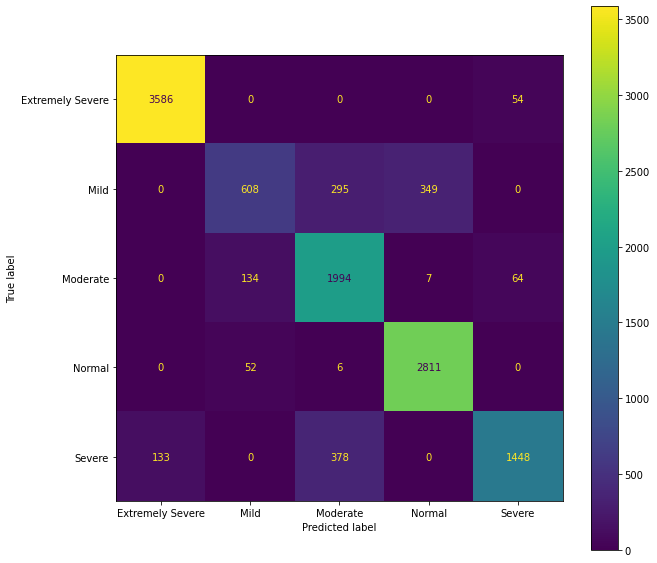

In [19]:
knn_depression=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled_depression,y_train_depression)
Acc_knn_depression=round(accuracy_score(y_test_depression,knn_depression.predict(X_test_scaled_depression)),3)
f1_knn_depression=round(f1_score(y_test_depression,knn_depression.predict(X_test_scaled_depression),average='weighted'),3)
recall_knn_depression=round(recall_score(y_test_depression,knn_depression.predict(X_test_scaled_depression),average='weighted'),3)
precision_knn_depression=round(precision_score(y_test_depression,knn_depression.predict(X_test_scaled_depression),average='weighted'),3)
print('Accuracy:',Acc_knn_depression)
print('F1_Score:',f1_knn_depression)
print('Recall_Score:',recall_knn_depression)
print('Precision_Score:',precision_knn_depression)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn_depression, X_train_scaled_depression, y_train_depression, cv = 6)),3))
classification_depression=classification_report(
    digits=4,
    y_true=y_test_depression,
    y_pred=knn_depression.predict(X_test_scaled_depression))
print(classification_depression)
fig_depression, ax_depression = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn_depression,X_test_scaled_depression,y_test_depression,ax=ax_depression)

In [20]:
X_hasil_depression = (0,2,0,1,0,2,0,1,0,0,1,2,2,2,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_depression = np.asarray(X_hasil_depression)

X_hasil_reshaped_depression = X_hasil_numpy_depression.reshape(1,-1)

hasil_akhir_depression = knn_depression.predict(X_hasil_reshaped_depression)
print('Tingkat depresi: ',hasil_akhir_depression)

X_hasil_stress = (3,2,2,3,3,2,2,3,3,3,3,2,2,3,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_stress = np.asarray(X_hasil_stress)

X_hasil_reshaped_stress = X_hasil_numpy_stress.reshape(1,-1)

hasil_akhir_stress = knn_depression.predict(X_hasil_reshaped_stress)
print('Tingkat stress: ',hasil_akhir_stress)

Tingkat depresi:  ['Extremely Severe']
Tingkat stress:  ['Extremely Severe']


d:\Python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.869
F1_Score: 0.874
Recall_Score: 0.869
Precision_Score: 0.89


d:\Python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

Cross Validation Score: 0.875
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.8835    0.9382      3640
            Mild     0.6185    0.8131    0.7026      1252
        Moderate     0.8485    0.8531    0.8508      2199
          Normal     0.9893    0.8404    0.9088      2869
          Severe     0.7613    0.9362    0.8397      1959

        accuracy                         0.8688     11919
       macro avg     0.8435    0.8653    0.8480     11919
    weighted avg     0.8902    0.8688    0.8740     11919



d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


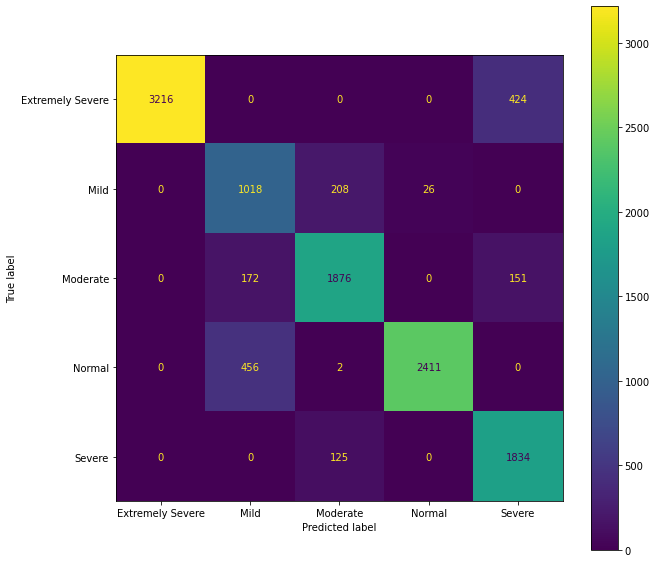

In [21]:
gb_depression=GaussianNB().fit(X_train_scaled_depression,y_train_depression)
Acc_gb_depression=round(accuracy_score(y_test_depression,gb_depression.predict(X_test_scaled_depression)),3)
f1_gb_depression=round(f1_score(y_test_depression,gb_depression.predict(X_test_scaled_depression),average='weighted'),3)
recall_gb_depression=round(recall_score(y_test_depression,gb_depression.predict(X_test_scaled_depression),average='weighted'),3)
precision_gb_depression=round(precision_score(y_test_depression,gb_depression.predict(X_test_scaled_depression),average='weighted'),3)
print('Accuracy:',Acc_gb_depression)
print('F1_Score:',f1_gb_depression)
print('Recall_Score:',recall_gb_depression)
print('Precision_Score:',precision_gb_depression)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb_depression, X_train_scaled_depression, y_train_depression, cv = 6)),3))
classification_depression=classification_report(
    digits=4,
    y_true=y_test_depression,
    y_pred=gb_depression.predict(X_test_scaled_depression))
print(classification_depression)
fig_depression, ax_depression = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb_depression,X_test_scaled_depression,y_test_depression,ax=ax_depression)

In [22]:
X_hasil_depression = (0,2,0,1,0,2,0,1,0,0,1,2,2,2,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_depression = np.asarray(X_hasil_depression)

X_hasil_reshaped_depression = X_hasil_numpy_depression.reshape(1,-1)

hasil_akhir_depression = gb_depression.predict(X_hasil_reshaped_depression)
print('Tingkat depresi: ',hasil_akhir_depression)

Tingkat depresi:  ['Extremely Severe']


C:\Users\AZZA\AppData\Local\Temp\ipykernel_684\2098669513.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  max_features='auto').fit(X_train_scaled_depression,y_train_depression)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.924
F1_Score: 0.921
Recall_Score: 0.924
Precision_Score: 0.923


d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been depre

Cross Validation Score: 0.924
                  precision    recall  f1-score   support

Extremely Severe     0.9846    0.9846    0.9846      3640
            Mild     0.8704    0.6542    0.7469      1252
        Moderate     0.8509    0.9186    0.8834      2199
          Normal     0.9322    0.9773    0.9542      2869
          Severe     0.9110    0.9096    0.9103      1959

        accuracy                         0.9237     11919
       macro avg     0.9098    0.8889    0.8959     11919
    weighted avg     0.9232    0.9237    0.9215     11919



d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\AZZA\AppData\Local\Temp\ipykernel_684\2098669513.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  max_features='auto').fit(X_train_scaled_stress,y_train_stress)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.91
F1_Score: 0.908
Recall_Score: 0.91
Precision_Score: 0.909


d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been depre

Cross Validation Score: 0.904
                  precision    recall  f1-score   support

Extremely Severe     0.9785    0.9699    0.9742      3151
            Mild     0.8603    0.6886    0.7649      1413
        Moderate     0.8600    0.9041    0.8815      2649
          Normal     0.9259    0.9487    0.9372      2068
          Severe     0.8892    0.9320    0.9101      2558

        accuracy                         0.9097     11839
       macro avg     0.9028    0.8887    0.8936     11839
    weighted avg     0.9094    0.9097    0.9082     11839



d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\AZZA\AppData\Local\Temp\ipykernel_684\2098669513.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  max_features='auto').fit(X_train_scaled_anxiety,y_train_anxiety)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.894
F1_Score: 0.891
Recall_Score: 0.894
Precision_Score: 0.893


d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been depre

Cross Validation Score: 0.891
                  precision    recall  f1-score   support

Extremely Severe     0.9906    0.9327    0.9608      1470
            Mild     0.8420    0.6605    0.7403      1791
        Moderate     0.8291    0.9075    0.8665      2615
          Normal     0.9245    0.9728    0.9481      4081
          Severe     0.8881    0.8934    0.8907      2016

        accuracy                         0.8935     11973
       macro avg     0.8949    0.8734    0.8813     11973
    weighted avg     0.8933    0.8935    0.8911     11973



d:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


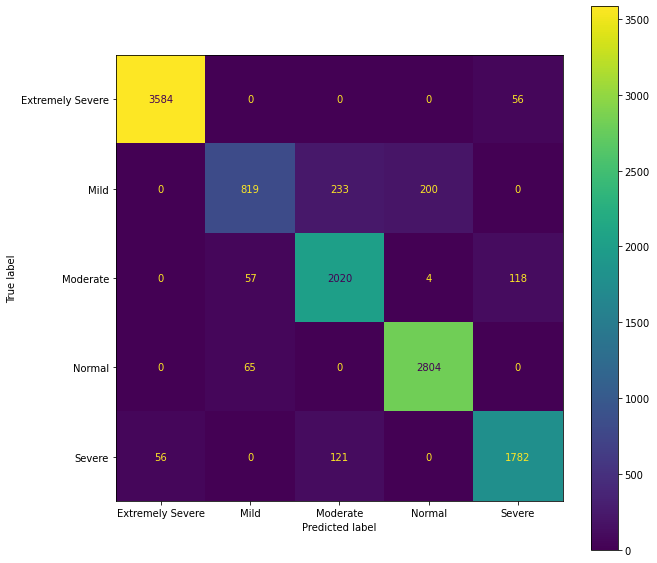

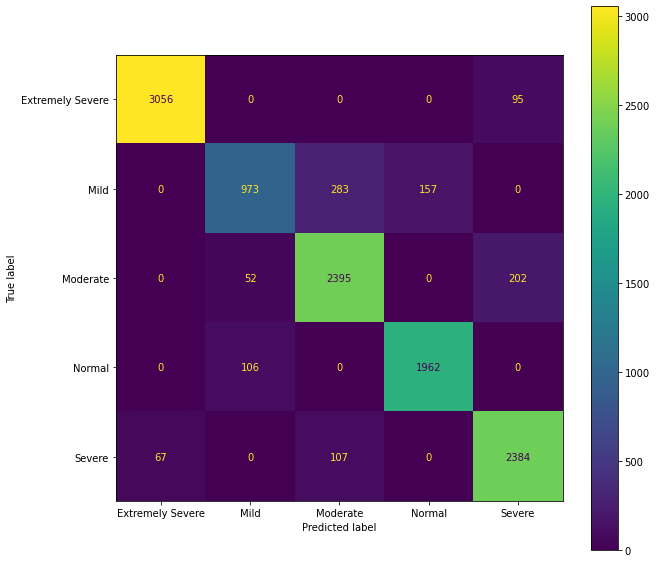

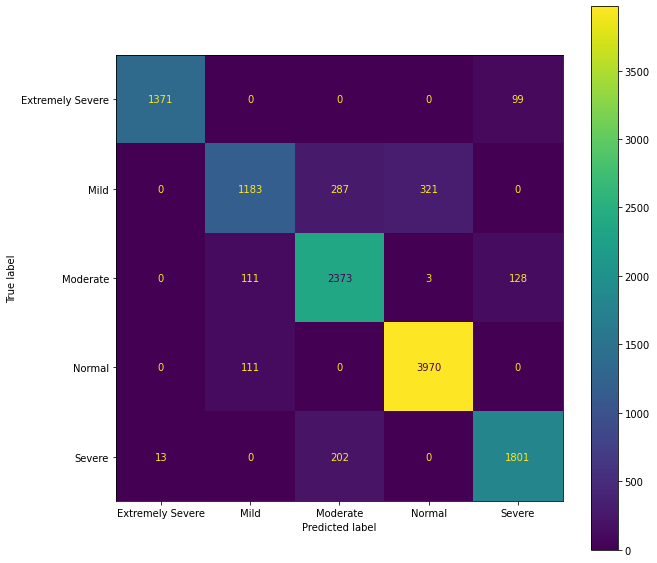

In [27]:
# depression
RanFor_depression = RandomForestClassifier(n_estimators = 190,
                                        min_samples_split = 3,
                                        min_samples_leaf = 1,
                                        max_depth = 160,
                                        max_features='auto').fit(X_train_scaled_depression,y_train_depression)
Acc_ran_depression = round(accuracy_score(y_test_depression,RanFor_depression.predict(X_test_scaled_depression)),3)
f1_ran_depression = round(f1_score(y_test_depression,RanFor_depression.predict(X_test_scaled_depression),average='weighted'),3)
recall_ran_depression = round(recall_score(y_test_depression,RanFor_depression.predict(X_test_scaled_depression),average='weighted'),3)
precision_ran_depression = round(precision_score(y_test_depression,RanFor_depression.predict(X_test_scaled_depression),average='weighted'),3)
print('Accuracy:',Acc_ran_depression)
print('F1_Score:',f1_ran_depression)
print('Recall_Score:',recall_ran_depression)
print('Precision_Score:',precision_ran_depression)
print('Cross Validation Score:',round(np.mean(cross_val_score(
                                            RanFor_depression, X_train_scaled_depression, 
                                            y_train_depression, cv = 6)),3))
classification_depression = classification_report(
    digits = 4,
    y_true = y_test_depression,
    y_pred = RanFor_depression.predict(X_test_scaled_depression))
print(classification_depression)
fig_depression, ax_depression = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor_depression,X_test_scaled_depression,y_test_depression,ax=ax_depression)

# stress
RanFor_stress = RandomForestClassifier(n_estimators = 190,
                                    min_samples_split = 3,
                                    min_samples_leaf = 1,
                                    max_depth = 160,
                                    max_features='auto').fit(X_train_scaled_stress,y_train_stress)
Acc_ran_stress = round(accuracy_score(y_test_stress,RanFor_stress.predict(X_test_scaled_stress)),3)
f1_ran_stress = round(f1_score(y_test_stress,RanFor_stress.predict(X_test_scaled_stress),average='weighted'),3)
recall_ran_stress = round(recall_score(y_test_stress,RanFor_stress.predict(X_test_scaled_stress),average='weighted'),3)
precision_ran_stress = round(precision_score(y_test_stress,RanFor_stress.predict(X_test_scaled_stress),average='weighted'),3)
print('Accuracy:',Acc_ran_stress)
print('F1_Score:',f1_ran_stress)
print('Recall_Score:',recall_ran_stress)
print('Precision_Score:',precision_ran_stress)
print('Cross Validation Score:',round(np.mean(cross_val_score(
                                            RanFor_stress, X_train_scaled_stress, 
                                            y_train_stress, cv = 6)),3))
classification_stress = classification_report(
    digits = 4,
    y_true = y_test_stress,
    y_pred = RanFor_stress.predict(X_test_scaled_stress))
print(classification_stress)
fig_stress, ax_stress = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor_stress,X_test_scaled_stress,y_test_stress,ax=ax_stress)

#anxiety
RanFor_anxiety = RandomForestClassifier(n_estimators=190,
                                        min_samples_split=3,
                                        min_samples_leaf=1,
                                        max_depth=160,
                                        max_features='auto').fit(X_train_scaled_anxiety,y_train_anxiety)
Acc_ran_anxiety = round(accuracy_score(y_test_anxiety,RanFor_anxiety.predict(X_test_scaled_anxiety)),3)
f1_ran_anxiety = round(f1_score(y_test_anxiety,RanFor_anxiety.predict(X_test_scaled_anxiety),average='weighted'),3)
recall_ran_anxiety = round(recall_score(y_test_anxiety,RanFor_anxiety.predict(X_test_scaled_anxiety),average='weighted'),3)
precision_ran_anxiety = round(precision_score(y_test_anxiety,RanFor_anxiety.predict(X_test_scaled_anxiety),average='weighted'),3)
print('Accuracy:',Acc_ran_anxiety)
print('F1_Score:',f1_ran_anxiety)
print('Recall_Score:',recall_ran_anxiety)
print('Precision_Score:',precision_ran_anxiety)
print('Cross Validation Score:',round(np.mean(cross_val_score(
                                            RanFor_anxiety, X_train_scaled_anxiety, 
                                            y_train_anxiety, cv = 6)),3))
classification_anxiety = classification_report(
    digits = 4,
    y_true = y_test_anxiety,
    y_pred = RanFor_anxiety.predict(X_test_scaled_anxiety))
print(classification_anxiety)
fig_anxiety, ax_anxiety = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor_anxiety,X_test_scaled_anxiety,y_test_anxiety,ax=ax_anxiety)

In [28]:
#Hasil Depressi
X_hasil_depression = (0,2,0,1,0,2,0,1,0,0,1,2,2,2,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_depression = np.asarray(X_hasil_depression)

X_hasil_reshaped_depression = X_hasil_numpy_depression.reshape(1,-1)

hasil_akhir_depression = RanFor_depression.predict(X_hasil_reshaped_depression)
print('Tingkat depresi: ',hasil_akhir_depression)

#Hasil Stress
X_hasil_stress = (3,2,2,3,3,2,2,3,3,3,3,2,2,3,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_stress = np.asarray(X_hasil_stress)

X_hasil_reshaped_stress = X_hasil_numpy_stress.reshape(1,-1)

hasil_akhir_stress = RanFor_depression.predict(X_hasil_reshaped_stress)
print('Tingkat stress: ',hasil_akhir_stress)

#Hasil Anxiety
X_hasil_anxiety = (0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy_anxiety = np.asarray(X_hasil_anxiety)

X_hasil_reshaped_anxiety = X_hasil_numpy_anxiety.reshape(1,-1)

hasil_akhir_anxiety = RanFor_depression.predict(X_hasil_reshaped_anxiety)
print('Tingkat anxiety: ',hasil_akhir_anxiety)

Tingkat depresi:  ['Severe']
Tingkat stress:  ['Extremely Severe']
Tingkat anxiety:  ['Severe']
